# Adult Dataset (LUX RESEARCH)

### About the notebook - This Notebook is just a demonstration of the LUX library, It does not hold the official data analysis, and official algorithms of the dataset, It is just to get the knowledge of the library LUX how we can use it.

The Note book is made on the basis of how simply we can get the apporach towards the EDA and the algorithms which we use in our day-to-day Machine Librabry Life,
as Sir Afelio told on the meeting held on March 7, that we can make two different pipelines of the same dataset, here's  what the approach looks like.

The one approach or the 1st Pipeline which started from In [1] to In [16] and then again started at In[17] and till the end, hence in between you may get another pipeline (the second one)  named (THE LUX Pipeline) where you may find the, EDA done by the LUX Automatically

## Author - : Akash Dasgupta

Here, We have a Dataset which is being named as Adult Dataset.
Let's Explore Some important features of this dataset before proceeding further.

We have total 14 attributes as we can see in this dataset below, We can see here a lot of attributes, So lets find the factors how we can show some relation with the different attributes.

## Before Starting let us load the important libraries!
 The Machine Learning Model we are going to use over here is 
 Decision Tree, Logistic Regression, LinearDiscriminantAnalysis, KNN, GaussianNB


Let's Explore but before that let's load the data and have a look !

# PIPELINE 1 (Manual Pipeline)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [2]:
adult = pd.read_csv(r'C:\Users\Adin\Desktop\Ignitus\adult.data.csv')

In [3]:
adult.head()
adult.sum()

age                                                         1256257
workclass         State-govSelf-emp-not-incPrivatePrivatePrivate...
fnlwgt                                                   6179373392
education         BachelorsBachelorsHS-grad11thBachelorsMasters9...
education-num                                                328237
marital-status    Never-marriedMarried-civ-spouseDivorcedMarried...
occupation        Adm-clericalExec-managerialHandlers-cleanersHa...
relationship      Not-in-familyHusbandNot-in-familyHusbandWifeWi...
race              WhiteWhiteWhiteBlackBlackWhiteBlackWhiteWhiteW...
sex               MaleMaleMaleMaleFemaleFemaleFemaleMaleFemaleMa...
capital-gain                                               35089324
capital-loss                                                2842700
hours-per-week                                              1316684
native-country    United-StatesUnited-StatesUnited-StatesUnited-...
salary            <=50K<=50K<=50K<=50K<=50K<=50K

### Getting more from the data

Now as we have imported the dataset let us find out the size of the dataset using "df.shape" command, also we will get the information of the data and the data types by using "df.info" command.

In [4]:
adult.shape

(32561, 15)

In [5]:
adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


Hence, We can see there are no null values so we don't need any extra effort to treat and we cansave our efficient time


## Exploratory Data Analysis

Let's start analysing the data with EDA with some of the graphs, How they shows Relation with eachother.

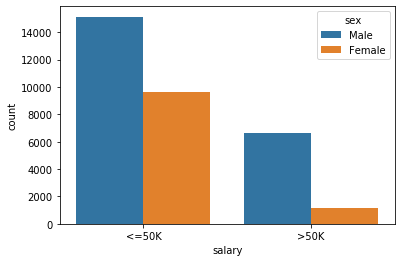

In [6]:
sns.countplot(x='salary', hue='sex', data=adult )

By the above plot we can see that on according to this dataset mainly the category of males earn more than females based on above 50K or below 50K, Why only this much ???
Let's Explore more

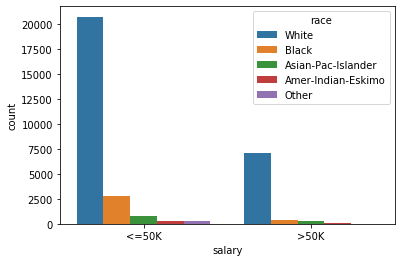

In [7]:
sns.countplot(x ='salary',hue='race', data=adult)

### Well Let me tell you first I am not a Racist !!

When I tried to find the salary based on the race what I got is this! 
But according to this dataset we see that a Good Earning Labours are mostly comprised of the whites!
Next is blacks and later on others
This was canculated on both basis >= 50K and <= 50K

Now, Here we will check for the outliers if any is present or not, if there is any we will soon remove it inorde to get the better accuracy

Hence Seaborn library offers us the box plot to check the outliers we will be using that here, using a for loop we will find the boxplots for each numeric attributes

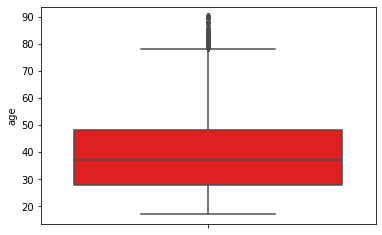

In [8]:
sns.boxplot(y=adult['age'],color='r',data=adult)
plt.show()

The only factor which we could check was age in this dara set, hence we find that there are some outliers we will deal withit now, so let's describe the age column of the data here

In [9]:
adult['age'].describe()

count    32561.000000
mean        38.581647
std         13.640433
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64

In [10]:
adult['age'] = np.where(adult['age']> 48, np.mean(adult['age']), adult['age']) 

In [11]:
adult.head(2)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39.000000,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,38.581647,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K


Removing the outlier by replacing all age above 48 by its mean

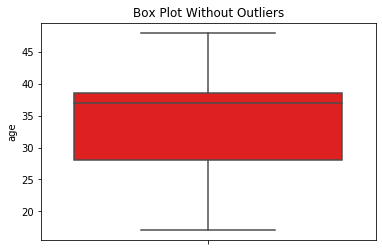

In [12]:
sns.boxplot(y=adult['age'],color='r',data=adult).set_title('Box Plot Without Outliers')
plt.show()

The above boxplot shows us that the outliers are completely removed

## Histograms

Histograms are used to check the normal distribution, wheather our data is normally distributed or not let's grab this information using the histogram.

Well if we form the bell shaped curve then we can say that out data is perfectely distributed.

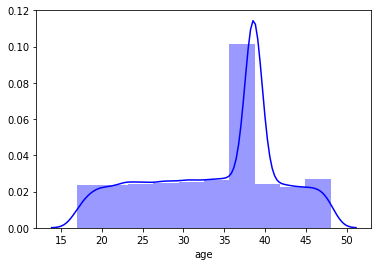

In [13]:
sns.distplot(adult['age'], color='b',kde=True, bins=10)

We can see it forms a bell shaped but a little of left skewed, we will even explore the kurtosis and skewness of the ages below, what are the values basically.

In [14]:
kurtosis = adult['age'].kurt()
skewness = adult['age'].skew()
print('Kurtosis -:',kurtosis)
print('Skewness -:',skewness)

Kurtosis -: -0.8151993121593981
Skewness -: -0.42681956733819704


## Count-Plot
Now we will look more deepely about how thesalary is distributed using the count plot which is offered by the seaborn library 

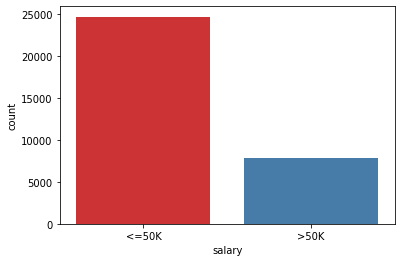

In [15]:
sns.countplot(x='salary',data=adult,palette='Set1')
plt.show()

We can see that basically there are more number of peoples who earns less than 50k as compared to more than 50k.
Let's comapre the race again on the countplot and see what the data tells us about the race

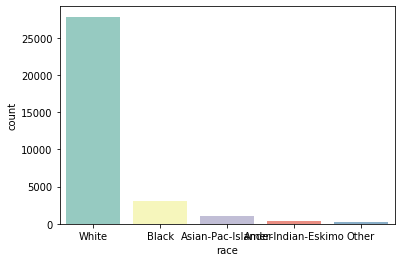

In [16]:
sns.countplot(x='race',data=adult,palette='Set3')
plt.show()

This data is composed of mostly whites and then the blacks as of what the countplots tells us.

# LUX Library (LUX PIPELINE)

Description -: Lux is a Python library that facilitate fast and easy data exploration by automating the visualization and data analysis process. By simply printing out a dataframe in a Jupyter notebook, Lux recommends a set of visualizations highlighting interesting trends and patterns in the dataset. Visualizations are displayed via an interactive widget that enables users to quickly browse through large collections of visualizations and make sense of their data.

Let's import the library

In [29]:
import lux
import pandas as pd

Here Below yoy can see a Toggle button it will help you to visualize data by just one click using LUX,
I will be exploring lux more in the upcoming notebooks.

Here we can see three different types of sections using the LUX API,
Correlation
Distribution
Occurence

Hence by this Library we can get easy hand on practice to the EDA

In [31]:
df = pd.read_csv(r'C:\Users\Adin\Desktop\Ignitus\adult.data.csv')
df

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

# Data Preprocessing
Let's use some models in our dataset and measure the accuracy, but before that we much describe the data and then peform some encodings in our dataset as for example -

We have the sex category, we can change the male or female to 0 or 1 by using label encoding or one-hot encoding, but in this case we will be using the label encodings from sklearn library.

In [17]:
from sklearn.preprocessing import LabelEncoder

In [18]:
label = LabelEncoder()

What we will be using here is -
For all the columns in  adult dataset, which ever is object we will encode it to a numerical value.

fit_transform() is a function which will label the categorical to numercal

In [19]:
for col in adult.columns:
    if adult[col].dtypes =='object':
        adult[col]=label.fit_transform(adult[col])

In [20]:
adult.head(2)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39.000000,7,77516,9,13,4,1,1,4,1,2174,0,40,39,0
1,38.581647,6,83311,9,13,2,4,0,4,1,0,0,13,39,0


We  can see all the categorical to numerical value.
Now let's split the X and Y variables on which we will make the predictions 

In [21]:
x = adult.drop(columns = 'salary')
x

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39.000000,7,77516,9,13,4,1,1,4,1,2174,0,40,39
1,38.581647,6,83311,9,13,2,4,0,4,1,0,0,13,39
2,38.000000,4,215646,11,9,0,6,1,4,1,0,0,40,39
3,38.581647,4,234721,1,7,2,6,0,2,1,0,0,40,39
4,28.000000,4,338409,9,13,2,10,5,2,0,0,0,40,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27.000000,4,257302,7,12,2,13,5,4,0,0,0,38,39
32557,40.000000,4,154374,11,9,2,7,0,4,1,0,0,40,39
32558,38.581647,4,151910,11,9,6,1,4,4,0,0,0,40,39
32559,22.000000,4,201490,11,9,4,1,3,4,1,0,0,20,39


In [22]:
y = adult['salary']
y

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    1
32558    0
32559    0
32560    1
Name: salary, Length: 32561, dtype: int32

Splitting the data into train and test variable using train_test_split()
using test size = 30% and Random state = 42

In [23]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.30, random_state=42)

## Algorithms

Here we are going to create a empty list of model and going to store the algorithms in it,

In [24]:
model = []
model.append(("LR",LogisticRegression()))
model.append(("LDA",LinearDiscriminantAnalysis()))
model.append(("KNN",KNeighborsClassifier()))
model.append(("DT/CART",DecisionTreeClassifier()))
model.append(("NB",GaussianNB()))

Same way we will be storing the result and names in a list which is shown below

In [25]:
result = []

In [26]:
names = []

We will run a for loop to select particular model and train from the list of models and trai on the data.

kfold is a crossvalidation form, where we divide our datasets into k number of parts, and keep a fold for testing and rest all for traning and later the one which is kept for testing is used for training and next fold for testing

Basically here we are dividing our data into 10 parts or folds.

But make sure you have imported the model selection from the sklearm library.

In [27]:
from sklearn import model_selection

In [28]:
for name,models in model:
    kfold = model_selection.KFold(n_splits=10, random_state = 7)
    cv_result = model_selection.cross_val_score(models,xtrain,ytrain,cv=kfold, scoring='accuracy')
    result.append(cv_result)
    names.append(name)
    msg = "%s,%f(%f)"%(name,cv_result.mean(), cv_result.std())
    print(msg)

D:\A\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
D:\A\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\A\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data

LR,0.787996(0.008669)


D:\A\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


LDA,0.819630(0.004149)


D:\A\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


KNN,0.770490(0.007253)


D:\A\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


DT/CART,0.815242(0.007040)


D:\A\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


NB,0.793217(0.006123)


So, Here we can see that the accuracy we had received by various algorithms are -:

Logistic Regression - 78%
Linear Discriminant Analysis - 81% 
KNN - 77%
Desicion Tree - 81%
Gaussian NB - 79%


Let us now kill the process from os.

So first we need to import os

In [ ]:
import os
os.kill(os.getpid(), 9)